## Confusion Matrix

In [10]:
import warnings
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# ignore warnings 

warnings.filterwarnings('ignore')

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df= pd.read_csv(url)

In [12]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

test_size= 0.33
seed=7


In [14]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=7)

In [16]:
# Train model
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa'], dtype=obj

[[18  0  0]
 [ 2 17  0]
 [ 0  0 13]]


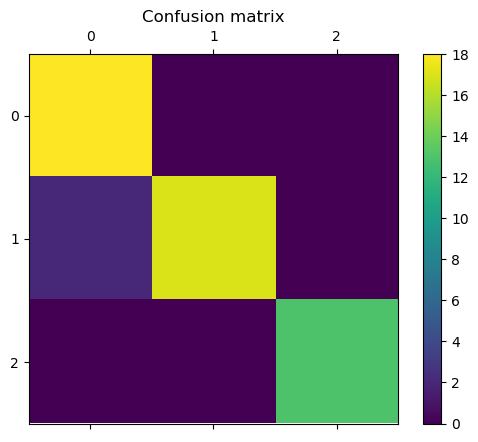

In [19]:
# Confusion matrix
labels = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
cm = confusion_matrix(y_test,pred,labels=labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.show()

# Accuracy 

In [20]:
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [21]:
warnings.filterwarnings('ignore')

iris = datasets.load_iris()
X= iris.data
y = iris.target
test_size=0.33


In [25]:
# cross validation settings
kfold = model_selection.KFold(n_splits=10)

model = LogisticRegression()

scoring = 'accuracy'
results = model_selection.cross_val_score(model,X,y,cv = kfold,scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))


Accuracy -val set: 94.67% (0.06)


In [26]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=7)


In [27]:
model.fit(X_train,y_train)

result= model.score(X_test,y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 92.00%


# F1 Score

In [29]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score,precision_score,recall_score,f1_score


In [43]:
warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pd.read_csv(url)
dat = dataframe.values
dat

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 3.51e-01, 3.10e+01, 0.00e+00],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 6.72e-01, 3.20e+01, 1.00e+00],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 1.67e-01, 2.10e+01, 0.00e+00],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.45e-01, 3.00e+01, 0.00e+00],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.49e-01, 4.70e+01, 1.00e+00],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.15e-01, 2.30e+01, 0.00e+00]])

In [46]:
X = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed=7
model = LogisticRegression()
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=seed)
model.fit(X_train,y_train)
pred = model.predict(X_test)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)

In [47]:
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)


Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


# ROC (Receiver Operating Characterstics)

In [48]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve

In [51]:
warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(url)
dat = df.values
X = dat[:,:-1]
y = dat[:,-1]
seed=7


In [52]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=7)

In [54]:
model.fit(X_train,y_train)

probs = model.predict_proba(X_test)
#predict() would output class 0 since the class probability for 0 is 0.6.
# [0.6, 0.2, 0.2] is the output of predict_proba that simply denotes that the class probability for classes 0, 1, and 2 are 0.6, 0.2, and 0.2 respectively.


AUC - Test Set: 82.85%


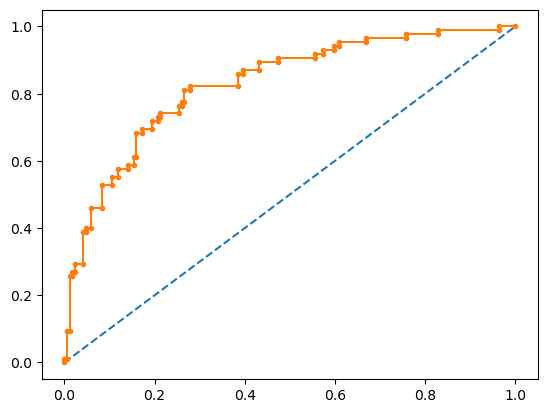

In [55]:
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

fpr,tpr,thresholds = roc_curve(y_test,probs)

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')